In [ ]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



Cette première partie correspond à l'importation des bibliothèques nécessaires pour travailler sur les Graph Neural Networks (GNNs). Voici une brève explication de chaque bibliothèque et pourquoi elle pourrait être utile :

1. **`os`** :
   - Permet d'interagir avec le système d'exploitation, comme la gestion des fichiers et des répertoires.
   - Utilisé pour charger ou enregistrer des données et des modèles.
\
2. **`pandas` (`pd`)** :
   - Fournit des structures de données comme les DataFrames pour manipuler les données tabulaires.
   - Utile pour charger, nettoyer, et préparer les données avant de construire un graphe.

3. **`numpy` (`np`)** :
   - Utilisé pour les calculs numériques, comme la manipulation de matrices et de vecteurs.
   - Essentiel pour les opérations mathématiques dans le cadre de l'apprentissage machine.

4. **`networkx` (`nx`)** :
   - Bibliothèque spécialisée dans la création, la manipulation et l'analyse des graphes.
   - Idéal pour créer et visualiser des graphes avant leur passage dans un GNN.

5. **`matplotlib.pyplot` (`plt`)** :
   - Bibliothèque pour tracer et visualiser les données.
   - Peut être utilisée pour visualiser les graphes ou les résultats.

6. **`tensorflow` et `keras`** :
   - Framework d'apprentissage automatique pour construire et entraîner les modèles de réseaux de neurones.
   - Ici, il sera utilisé pour définir et entraîner le GNN.

7. **`tensorflow.keras.layers`** :
   - Fournit les différentes couches utilisées pour construire les réseaux de neurones.
   - Essentiel pour personnaliser et ajuster l'architecture du GNN.



In [ ]:
zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

168052/168052 ━━━━━━━━━━━━━━━━━━━━ 1s 3us/step


In [ ]:
citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)
print("Citations shape:", citations.shape)

Citations shape: (5429, 2)


In [ ]:
citations.sample(frac=1).head()

,target,source
2160,18774,73146
1489,7047,1135082
1928,13213,1152143
5209,643221,642894
946,3828,1956


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['source'].plot(kind='hist', bins=20, title='source')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='target', y='source', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['source'].plot(kind='line', figsize=(8, 4), title='source')
plt.gca().spines[['top', 'right']].set_visible(False)

Dans cette étape, nous téléchargeons et préparons les données du dataset **Cora**, qui est souvent utilisé pour des tâches liées aux Graph Neural Networks. Voici une explication pas à pas.



### Code expliqué :

1. **Téléchargement et extraction du jeu de données** :
   ```python
   zip_file = keras.utils.get_file(
       fname="cora.tgz",
       origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
       extract=True,
   )
   ```
   - **`keras.utils.get_file`** : Télécharge le fichier spécifié par l'URL (`origin`) et l'extrait automatiquement.
   - **`fname`** : Nom du fichier à télécharger.
   - **`origin`** : URL de la source du fichier.
   - **`extract=True`** : Permet d'extraire automatiquement les fichiers du fichier compressé.

2. **Définir le chemin du répertoire des données** :
   ```python
   data_dir = os.path.join(os.path.dirname(zip_file), "cora")
   ```
   - Combine le chemin du fichier extrait et le sous-dossier "cora" contenant les données.

3. **Chargement des citations (arêtes du graphe)** :
   ```python
   citations = pd.read_csv(
       os.path.join(data_dir, "cora.cites"),
       sep="\t",
       header=None,
       names=["target", "source"],
   )
   ```
   - **`os.path.join(data_dir, "cora.cites")`** : Chemin du fichier contenant les relations entre les articles (cibles et sources).
   - **`sep="\t"`** : Les colonnes sont séparées par une tabulation.
   - **`header=None`** : Pas de ligne d'en-tête dans le fichier.
   - **`names=["target", "source"]`** : Donne des noms explicites aux colonnes.

4. **Afficher des informations sur les données** :
   ```python
   print("Citations shape:", citations.shape)
   ```
   - Affiche la forme du DataFrame (nombre de lignes et colonnes), ici représentant les arêtes du graphe.

5. **Aperçu aléatoire des données** :
   ```python
   citations.sample(frac=1).head()
   ```
   - **`sample(frac=1)`** : Mélange les lignes de manière aléatoire.
   - **`.head()`** : Affiche les 5 premières lignes des données mélangées.

---

### Résultat attendu :
1. **Forme des données** : Le message imprimé affichera quelque chose comme :
   ```
   Citations shape: (5429, 2)
   ```
   Ce qui indique qu'il y a 5 429 arêtes (relations entre articles).

2. **Aperçu des données** : Les colonnes "target" et "source" contiennent les identifiants des articles liés par des citations.


In [ ]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(
    os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
)
print("Papers shape:", papers.shape)

Papers shape: (2708, 1435)


In [ ]:
print(papers.sample(5).T)

                            1938             2109        2656        2372  \
paper_id                 1105877           820661      103528       82666   
term_0                         0                0           0           0   
term_1                         0                0           0           0   
term_2                         0                0           0           0   
term_3                         0                0           0           0   
...                          ...              ...         ...         ...   
term_1429                      0                0           0           0   
term_1430                      0                0           0           0   
term_1431                      0                0           0           0   
term_1432                      0                0           0           0   
subject    Probabilistic_Methods  Neural_Networks  Case_Based  Case_Based   

             78    
paper_id    40124  
term_0          0  
term_1         

In [ ]:
print(papers.subject.value_counts())

subject
Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: count, dtype: int64


Dans cette partie du code, nous chargeons les données concernant les **articles scientifiques** (nœuds du graphe) et leurs **caractéristiques** (features).

---

### Code expliqué :

1. **Définition des noms de colonnes** :
   ```python
   column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]
   ```
   - **`paper_id`** : Identifiant unique pour chaque article.
   - **`term_0` à `term_1432`** : Ce sont des caractéristiques représentant la présence ou l'absence de certains mots dans l'article (vecteur binaire avec 1433 termes possibles).
   - **`subject`** : La catégorie ou le domaine scientifique de l'article (par exemple, "Neural Networks", "Genetics").

2. **Chargement des données des articles** :
   ```python
   papers = pd.read_csv(
       os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
   )
   ```
   - **`cora.content`** : Fichier contenant des informations sur les articles.
   - **`sep="\t"`** : Les colonnes sont séparées par des tabulations.
   - **`header=None`** : Pas de ligne d'en-tête dans le fichier.
   - **`names=column_names`** : Définit les noms des colonnes selon la liste définie précédemment.

3. **Afficher la taille des données** :
   ```python
   print("Papers shape:", papers.shape)
   ```
   - Affiche le nombre d’articles (lignes) et d’attributs (colonnes).  
   - **Exemple attendu** :
     ```
     Papers shape: (2708, 1435)
     ```

4. **Aperçu des données (5 articles)** :
   ```python
   print(papers.sample(5).T)
   ```
   - **`sample(5)`** : Sélectionne 5 articles aléatoires.
   - **`.T`** : Transpose les données pour une visualisation plus lisible (colonnes affichées comme lignes).

5. **Comptage des sujets** :
   ```python
   print(papers.subject.value_counts())
   ```
   - **`papers.subject.value_counts()`** : Compte le nombre d’articles par catégorie scientifique.
   - Cela permet de voir la distribution des sujets (par exemple, combien d’articles appartiennent à "Neural Networks").





In [ ]:
class_values = sorted(papers["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

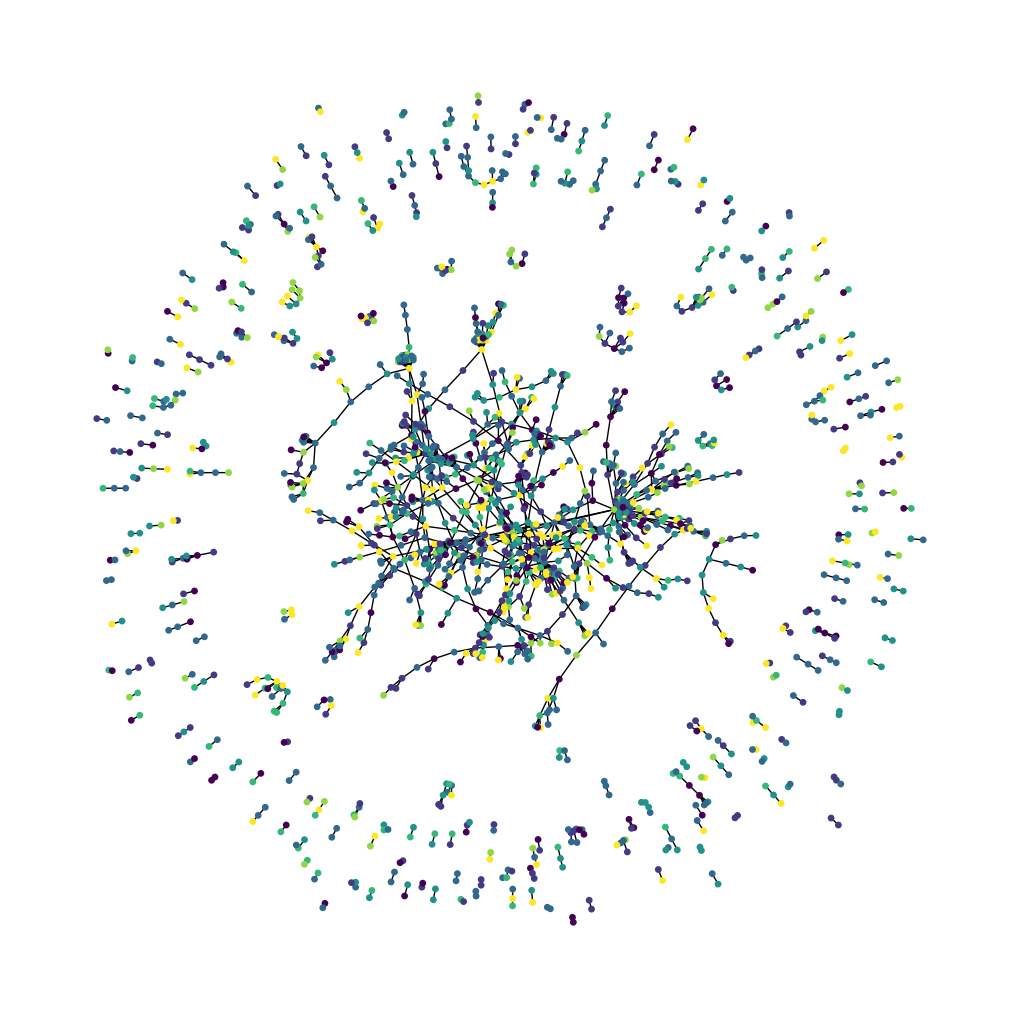

In [ ]:
plt.figure(figsize=(10, 10))
colors = papers["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)

Dans cette partie, nous préparons les données pour créer et visualiser un **graphe** des articles scientifiques.


### Étape 1 : Préparer les index

1. **Classes (`subject`)** :
   ```python
   class_values = sorted(papers["subject"].unique())
   class_idx = {name: id for id, name in enumerate(class_values)}
   ```
   - **`class_values`** : Liste des catégories uniques d'articles, triées.
   - **`class_idx`** : Dictionnaire qui associe chaque catégorie à un numéro unique.

2. **Articles (`paper_id`)** :
   ```python
   paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}
   ```
   - **`paper_idx`** : Associe chaque article à un numéro unique pour simplifier leur utilisation.


### Étape 2 : Transformer les données

1. **Appliquer les indices** :
   ```python
   papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
   citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
   citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
   papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])
   ```
   - Convertit les identifiants et les catégories des articles en **valeurs numériques**.
   - Simplifie la manipulation des données pour le modèle et le graphe.



### Étape 3 : Visualiser le graphe

1. **Créer un graphe avec NetworkX** :
   ```python
   cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
   ```
   - **`citations.sample(n=1500)`** : Sélectionne 1500 citations aléatoires pour un graphe plus petit et plus facile à visualiser.
   - **`nx.from_pandas_edgelist`** : Crée un graphe où les nœuds sont des articles et les arêtes sont des citations.

2. **Couleurs des nœuds (par catégorie)** :
   ```python
   subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
   ```
   - Associe une couleur à chaque nœud selon sa catégorie scientifique.

3. **Dessiner le graphe** :
   ```python
   nx.draw_spring(cora_graph, node_size=15, node_color=subjects)
   ```
   - **`nx.draw_spring`** : Utilise un algorithme pour positionner les nœuds de manière lisible.
   - **`node_size=15`** : Taille des nœuds.
   - **`node_color=subjects`** : Les nœuds sont colorés selon leur catégorie.


### Résultat attendu :
Vous obtenez une **visualisation du graphe** où :  
- Chaque **nœud** représente un article.
- Chaque **arête** représente une citation.
- Les **couleurs** montrent les catégories (ou "sujets") des articles.



In [ ]:
train_data, test_data = [], []

for _, group_data in papers.groupby("subject"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.5
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1351, 1435)
Test data shape: (1357, 1435)


Dans cette partie, nous divisons les données des articles en **données d'entraînement** et **données de test**.

### Explication des étapes :

1. **Grouper par sujet (`subject`)** :
   ```python
   for _, group_data in papers.groupby("subject"):
   ```
   - Les articles sont regroupés par leur **sujet** (par exemple, "Neural Networks", "Genetics", etc.).
   
2. **Sélection aléatoire des données** :
   ```python
   random_selection = np.random.rand(len(group_data.index)) <= 0.5
   ```
   - Pour chaque groupe d'articles (par sujet), une **sélection aléatoire** de 50 % des articles est faite pour les utiliser comme **données d'entraînement**. L’autre moitié sera utilisée pour le **test**.

3. **Séparer les données en ensembles d’entraînement et de test** :
   ```python
   train_data.append(group_data[random_selection])
   test_data.append(group_data[~random_selection])
   ```
   - Les articles sont **divisés** en **données d'entraînement** et **données de test** en fonction de la sélection aléatoire.

4. **Mélanger les données** :
   ```python
   train_data = pd.concat(train_data).sample(frac=1)
   test_data = pd.concat(test_data).sample(frac=1)
   ```
   - Après avoir séparé les données, elles sont **mélangées** (avec `.sample(frac=1)`) pour s’assurer que les données sont bien mélangées avant d’être utilisées dans l’entraînement et les tests.

### Résultat :
- Vous obtenez deux ensembles : **`train_data`** pour l'entraînement et **`test_data`** pour évaluer les performances du modèle.

Les **formes** de ces ensembles sont affichées pour vérifier leur taille.

In [ ]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

Ces variables définissent les **hyperparamètres** pour l'entraînement de notre modèle.

### Explication des hyperparamètres :

1. **`hidden_units = [32, 32]`** :  
   - **Nombre de neurones dans chaque couche cachée**.  
   - Ici, le modèle a **deux couches cachées**, chacune avec **32 neurones**.

2. **`learning_rate = 0.01`** :  
   - **Taux d'apprentissage**.  
   - C'est la vitesse à laquelle le modèle ajuste ses poids pendant l'entraînement. Ici, le modèle va ajuster ses poids à chaque étape de 0.01.

3. **`dropout_rate = 0.5`** :  
   - **Taux de dropout**.  
   - Cela signifie que **50% des neurones** seront ignorés (mis à zéro) de manière aléatoire pendant chaque mise à jour des poids pour éviter le **sur-apprentissage (overfitting)** et rendre le modèle plus général.

4. **`num_epochs = 300`** :  
   - **Nombre d'époques**.  
   - Le modèle sera entraîné pendant **300 itérations** sur l'ensemble des données d'entraînement.

5. **`batch_size = 256`** :  
   - **Taille de lot (batch)**.  
   - À chaque étape d'entraînement, le modèle va traiter **256 échantillons** de données avant d'ajuster les poids.

Ces paramètres influencent directement l'efficacité et la performance du modèle d'apprentissage profond.

In [ ]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()



Les deux fonctions présentées sont utilisées pour **entraîner et évaluer** un modèle d'apprentissage automatique, puis afficher les courbes d'apprentissage.

### 1. `run_experiment(model, x_train, y_train)` :
Cette fonction **entraîne** un modèle donné avec les données d’entraînement et renvoie l'historique de l'entraînement.

#### Explication des étapes :
- **Compilation du modèle** :
  ```python
  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate),
      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
  )
  ```
  - Utilise l'optimiseur **Adam** avec le taux d'apprentissage défini.
  - La **fonction de perte** choisie est la **Cross-Entropy** pour des classifications multiples.
  - L'**exactitude** (accuracy) est utilisée comme métrique pour évaluer la performance du modèle.

- **Callback `EarlyStopping`** :
  ```python
  early_stopping = keras.callbacks.EarlyStopping(
      monitor="val_acc", patience=50, restore_best_weights=True
  )
  ```
  - Arrête l'entraînement si l'**exactitude** de validation ne s'améliore pas pendant **50 époques consécutives**, et restaure les **meilleurs poids** du modèle.

- **Entraînement du modèle** :
  ```python
  history = model.fit(
      x=x_train,
      y=y_train,
      epochs=num_epochs,
      batch_size=batch_size,
      validation_split=0.15,
      callbacks=[early_stopping],
  )
  ```
  - Entraîne le modèle pendant **300 époques** avec une taille de **batch de 256**.
  - **15% des données** sont utilisées pour la validation.
  - Le modèle est entraîné avec les données **x_train** (caractéristiques) et **y_train** (étiquettes).

### 2. `display_learning_curves(history)` :
Cette fonction **affiche les courbes d'apprentissage** pour la **perte (loss)** et l'**exactitude (accuracy)** pendant l'entraînement.

#### Explication des étapes :
- Utilise **Matplotlib** pour créer un graphique avec deux sous-graphiques :
  - **Le premier graphique** montre la courbe de la **perte** (loss) pour l'entraînement et la validation.
  - **Le deuxième graphique** montre la courbe de l'**exactitude** (accuracy) pour l'entraînement et la validation.
  
- Les courbes permettent de suivre l'évolution de la **performance du modèle** au fil des époques et de vérifier si le modèle commence à sur-apprendre (overfitting) ou s'il converge correctement.


In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
feature_names = list(set(papers.columns) - {"paper_id", "subject"})
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject"]
y_test = test_data["subject"]

In [ ]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_features            │ (None, 1433)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ffn_block1 (Sequential)   │ (None, 32)             │         52,804 │ input_features[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ffn_block2 (Sequential)   │ (None, 32)             │          2,368 │ ffn_block1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ skip_connection2 (Add)    │ (None, 32)             │              0 │ ffn_block1[0][0],      │
│                           │                        │                │ ffn_block2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ffn_block3 (Sequential)   │ (None, 32)             │          2,368 │ skip_connection2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ skip_connection3 (Add)    │ (None, 32)             │              0 │ skip_connection2[0][0… │
│                           │                        │                │ ffn_block3[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ffn_block4 (Sequential)   │ (None, 32)             │          2,368 │ skip_connection3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ skip_connection4 (Add)    │ (None, 32)             │              0 │ skip_connection3[0][0… │
│                           │                        │                │ ffn_block4[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ffn_block5 (Sequential)   │ (None, 32)             │          2,368 │ skip_connection4[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ skip_connection5 (Add)    │ (None, 32)             │              0 │ skip_connection4[0][0… │
│                           │                        │                │ ffn_block5[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ logits (Dense)            │ (None, 7)              │            231 │ skip_connection5[0][0] │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 62,507 (244.17 KB)

 Trainable params: 59,065 (230.72 KB)

 Non-trainable params: 3,442 (13.45 KB)

In [ ]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - acc: 0.1648 - loss: 3.3288 - val_acc: 0.2956 - val_loss: 1.8792
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.2224 - loss: 2.6014 - val_acc: 0.3005 - val_loss: 1.8728
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.2397 - loss: 2.2725 - val_acc: 0.3103 - val_loss: 1.8559
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.2770 - loss: 2.0990 - val_acc: 0.2906 - val_loss: 1.8442
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.2680 - loss: 1.9913 - val_acc: 0.3202 - val_loss: 1.8350
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.3025 - loss: 1.9229 - val_acc: 0.3547 - val_loss: 1.8250
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.3262 - loss: 1.8087 - val_acc: 0.3498 - val_loss: 1.8042
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.3524 - loss: 1.7205 - val_acc: 0.3202 - val_loss: 1.7784
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.3817 - loss:

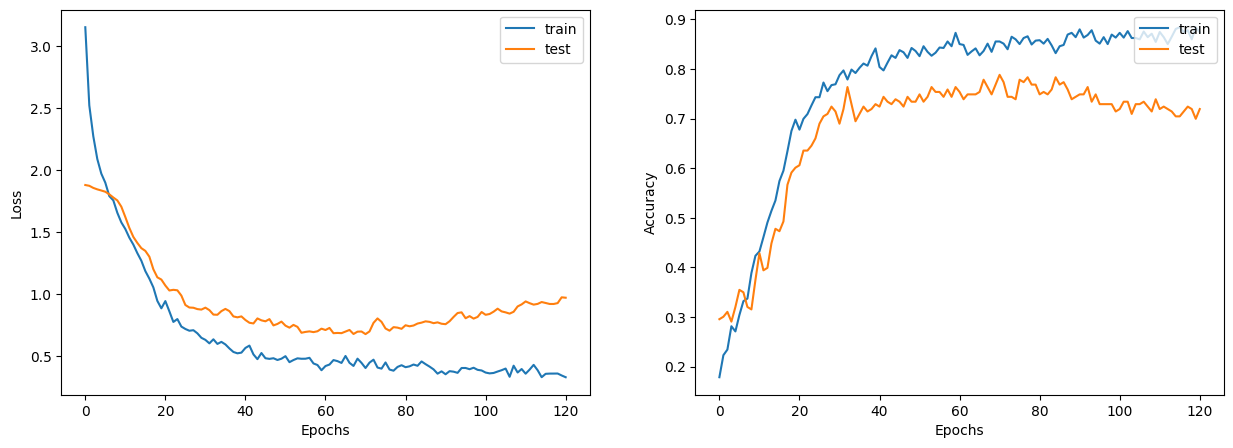

In [ ]:
display_learning_curves(history)

Ce code met en place un **modèle de réseau de neurones feedforward** (FFN) avec des **connexions résiduelles** (skip connections), puis entraîne ce modèle sur les données d'entraînement.

### Explication de chaque partie :

1. **`create_ffn`** :  
   - Cette fonction crée un **bloc de réseau de neurones feedforward (FFN)**, qui comprend :
     - **BatchNormalization** : Normalise les activations pour aider à stabiliser l'entraînement.
     - **Dropout** : Applique un taux de **dropout** pour éviter le sur-apprentissage.
     - **Dense Layer** : La couche dense avec un nombre donné d'unités et la fonction d'activation **GELU** (pour des activations plus douces).

2. **Préparation des données** :
   - `x_train`, `x_test`, `y_train`, et `y_test` sont extraits des données d'entraînement et de test et convertis en **tableaux NumPy** pour les utiliser dans le modèle.
   - **`feature_names`** : Liste des noms des caractéristiques des articles (tous sauf `paper_id` et `subject`).
   - **`num_features`** et **`num_classes`** : Nombre de caractéristiques d'entrée et de classes à prédire.

3. **`create_baseline_model`** :
   - Cette fonction crée un modèle de **réseau de neurones avec des connexions résiduelles** :
     - Un bloc FFN de base est ajouté en premier.
     - Ensuite, des blocs FFN supplémentaires sont créés et **connectés par des connexions résiduelles** (skip connections), qui permettent au modèle de "sauter" certaines couches, facilitant ainsi l'apprentissage et réduisant les risques de **vanishing gradient**.
     - La couche de **logits** est utilisée pour produire les résultats finaux de classification avec un nombre de sorties égal au nombre de classes.

4. **Entraînement et visualisation** :
   - **`baseline_model.summary()`** : Affiche un résumé du modèle, y compris les couches et les paramètres.
   - **`run_experiment`** : Entraîne le modèle sur les données d'entraînement et affiche l'historique des performances.
   - **`display_learning_curves`** : Affiche les courbes d'apprentissage, montrant l'évolution de la perte et de l'exactitude au cours de l'entraînement.


In [ ]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 73.77%


In [ ]:
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")


In [ ]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Instance 1:
- Case_Based: 89.72%
- Genetic_Algorithms: 0.49%
- Neural_Networks: 2.72%
- Probabilistic_Methods: 4.67%
- Reinforcement_Learning: 0.62%
- Rule_Learning: 0.48%
- Theory: 1.3%
Instance 2:
- Case_Based: 8.2%
- Genetic_Algorithms: 11.41%
- Neural_Networks: 46.36%
- Probabilistic_Methods: 4.0%
- Reinforcement_Learning: 10.63%
- Rule_Learning: 1.64%
- Theory: 17.76%
Instance 3:
- Case_Based: 24.33%
- Genetic_Algorithms: 22.04%
- Neural_Networks: 39.99%
- Probabilistic_Methods: 7.45%
- Reinforcement_Learning: 1.94%
- Rule_Learning: 2.76%
- Theory: 1.49%
Instance 4:
- Case_Based: 6.0%
- Genetic_Algorithms: 3.58%
- Neural_Networks: 16.78%
- Probabilistic_Methods: 51.85%
- Reinforcement_Learning: 2.42%
- Rule_Learning: 1.94%
- Theory: 17.44%
Instance 5:
- Case_Based: 40.71%
- Genetic_Algorithms: 1.39%
- Neural_Networks: 23.19%
- Probabilistic_Methods: 15.44%
- Reinforcement_Learning: 1.2%
- Rule_Learning: 11.38%
- Theory: 6.69%
Instance 6:
- Ca


### 1. **Évaluation du modèle sur les données de test** :
```python
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")
```
- Cette partie évalue le modèle préalablement entraîné sur les **données de test** (`x_test` et `y_test`) pour mesurer l'exactitude du modèle.
- **Résultat attendu :** Une précision de test de **73.77%** dans votre cas, indiquant la performance du modèle sur les données qu'il n'a jamais vues auparavant.

### 2. **Génération d'exemples aléatoires** :
```python
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)
```
- Cette fonction génère des **instances aléatoires** en fonction des probabilités moyennes de chaque caractéristique dans les **données d'entraînement** (`x_train`).
- **`token_probability`** représente la moyenne de chaque caractéristique (chaque colonne) dans les données d'entraînement.
- **`probabilities`** génère des nombres aléatoires, et l'instance est créée en fonction de la comparaison entre les probabilités générées et les moyennes des caractéristiques.

### 3. **Affichage des probabilités de classe pour de nouvelles instances** :
```python
def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")
```
- Cette fonction affiche les **probabilités de classe** pour chaque **instance** générée dans la fonction précédente. Les probabilités sont affichées sous forme de pourcentages.

### 4. **Prédiction des nouvelles instances** :
```python
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)
```
- **`new_instances`** : Génère **`num_classes`** nouvelles instances aléatoires.
- **`baseline_model.predict`** : Utilise le modèle pour prédire les **logits** (les sorties avant d'appliquer la fonction softmax).
- **Softmax** : Applique la **fonction softmax** pour convertir les logits en **probabilités de classe**.
- **Affichage des résultats** : Les probabilités pour chaque classe sont affichées pour chaque instance générée.


In [ ]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = citations[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    papers.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 5429)
Nodes shape: (2708, 1433)


Ce code prépare les **informations du graphe** à utiliser dans un modèle de Graph Neural Network (GNN) en créant des matrices qui représentent les **arêtes** (relations entre les nœuds) et les **caractéristiques des nœuds** (données associées à chaque nœud).

### 1. **Création de la matrice des arêtes** :
```python
edges = citations[["source", "target"]].to_numpy().T
```
- Ici, on crée une matrice des **arêtes** à partir des colonnes "source" et "target" de la table `citations`.
- Chaque arête relie deux nœuds (articles de recherche), définis par `source` et `target`.
- La matrice `edges` a la forme `[2, num_edges]`, où chaque colonne représente une arête avec deux indices : un pour le nœud source et un pour le nœud cible.

### 2. **Création du tableau des poids des arêtes** :
```python
edge_weights = tf.ones(shape=edges.shape[1])
```
- On crée un tableau de poids pour chaque arête. Ici, tous les poids sont définis à 1, ce qui signifie que chaque connexion entre nœuds est considérée comme ayant le même poids (importance).

### 3. **Création de la matrice des caractéristiques des nœuds** :
```python
node_features = tf.cast(
    papers.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
```
- On crée une matrice des **caractéristiques des nœuds**, c'est-à-dire les données associées à chaque article (comme les termes de texte, représentés sous forme de caractéristiques numériques).
- Les nœuds sont triés par `paper_id`, puis les colonnes correspondantes aux caractéristiques des articles sont extraites.
- **`node_features`** est une matrice de taille `[num_nodes, num_features]`, où chaque ligne représente les caractéristiques d'un article (nœud).

### 4. **Création de la structure du graphe** :
```python
graph_info = (node_features, edges, edge_weights)
```
- Cette ligne rassemble les **informations du graphe** dans un tuple `graph_info`, qui contient :
  - **`node_features`** : les caractéristiques des nœuds,
  - **`edges`** : la matrice des arêtes,
  - **`edge_weights`** : les poids des arêtes.

### 5. **Affichage des formes** :
```python
print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)
```
- Ces lignes affichent les dimensions des matrices des arêtes et des caractéristiques des nœuds pour s'assurer que tout est bien structuré.


In [ ]:
def create_gru(hidden_units, dropout_rate):
    inputs = keras.layers.Input(shape=(2, hidden_units[0]))
    x = inputs
    for units in hidden_units:
      x = layers.GRU(
          units=units,
          activation="tanh",
          recurrent_activation="sigmoid",
          return_sequences=True,
          dropout=dropout_rate,
          return_state=False,
          recurrent_dropout=dropout_rate,
      )(x)
    return keras.Model(inputs=inputs, outputs=x)


class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gru":
            self.update_fn = create_gru(hidden_units, dropout_rate)
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim].
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

### Explication en bref du code :

Ce code crée une **couche de convolution graphique** personnalisée (`GraphConvLayer`) pour un modèle de **Graph Neural Network (GNN)**. Cette couche permet de transformer les représentations des nœuds dans un graphe en utilisant les informations des voisins de chaque nœud. Voici les composants clés :

### 1. **Création d'un GRU** (`create_gru`):
- Cette fonction crée un modèle **GRU** (Gated Recurrent Unit) qui est utilisé pour mettre à jour les représentations des nœuds à chaque itération.
- Le GRU reçoit des entrées de taille `(2, hidden_units[0])` et applique plusieurs couches GRU (en fonction des `hidden_units` spécifiés).

### 2. **Classe `GraphConvLayer`** :
Cette classe représente une couche de convolution graphique. Elle est responsable de :
- **Préparation** des messages envoyés par les voisins d'un nœud.
- **Agrégation** de ces messages pour chaque nœud.
- **Mise à jour** des représentations des nœuds en fonction des messages agrégés.

### 3. **Méthodes importantes** :
- **`prepare`** : Cette méthode applique un **feed-forward network** (`ffn_prepare`) aux représentations des voisins, créant ainsi des "messages" qui seront envoyés aux nœuds cibles.
- **`aggregate`** : Elle agrège les messages des voisins d'un nœud en utilisant différentes méthodes : somme, moyenne, ou maximum.
- **`update`** : Cette méthode met à jour la représentation d'un nœud en combinant ses anciennes représentations avec les messages agrégés. Selon le type de combinaison (`gru`, `concat`, `add`), elle effectue une opération différente pour fusionner les informations.
  
### 4. **Processus du `call`** :
Le processus se déroule en trois étapes dans la méthode `call` :
- **Récupération des indices** des nœuds source et cible à partir des arêtes.
- **Préparation des messages** envoyés par les voisins en utilisant `prepare`.
- **Agrégation des messages** des voisins, puis **mise à jour** des nœuds avec ces messages.



In [ ]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

### Explication en bref de la classe `GNNNodeClassifier` :

Cette classe définit un modèle de **classification de nœuds dans un graphe** (Graph Neural Network - GNN). L'objectif est de prédire des classes (par exemple, les sujets de publications) pour chaque nœud (ici, chaque "paper" du jeu de données). Voici les composants clés du modèle :

### 1. **Initialisation (`__init__`)** :
Lors de la création de ce modèle, on passe des informations de graphe (comme les **nœuds**, **arêtes**, et **poids des arêtes**) ainsi que des paramètres comme le nombre de **classes**, les **unités cachées**, le **type d'agrégation**, le **type de combinaison**, et d'autres paramètres d'entraînement.

- **`node_features`** : Les caractéristiques des nœuds (features des articles) (par exemple, les termes associés à chaque papier).
- **`edges`** : Les arêtes représentant les connexions entre les nœuds (les citations entre articles).
- **`edge_weights`** : Les poids associés aux arêtes (si non fournis, ils sont initialisés à 1 et normalisés).

Le modèle comprend plusieurs couches :
- **`preprocess`** : Une couche pour traiter les caractéristiques des nœuds avant l'agrégation.
- **`conv1` et `conv2`** : Deux couches de convolution graphique (`GraphConvLayer`), chacune appliquant une agrégation de messages entre les nœuds.
- **`postprocess`** : Une couche pour affiner la représentation des nœuds après les convolutions.
- **`compute_logits`** : Une couche **dense** qui génère les logits (les prédictions non normalisées) pour chaque classe.

### 2. **Méthode `call`** :
La méthode `call` définit le processus d'entraînement pour le modèle. Voici les étapes clés :
- **Prétraitement des caractéristiques des nœuds** (`preprocess`).
- **Application des deux couches de convolution graphique** (`conv1` et `conv2`), chaque couche utilisant une agrégation des voisins pour ajuster les représentations des nœuds. Les **connections de saut** (skip connections) sont utilisées pour éviter de perdre de l'information des premières couches.
- **Post-traitement** des représentations des nœuds avec la couche `postprocess`.
- Les **représentations des nœuds** sont extraites à partir des indices d'entrée (`input_node_indices`), et les **logits** sont calculés via `compute_logits`.

### 3. **Utilisation des informations de graphe** :
Le modèle utilise les informations de graphe pour propager les informations entre les nœuds, et chaque nœud "échange" des informations avec ses voisins, ce qui permet à chaque nœud d'obtenir une représentation plus riche qui tient compte de sa structure dans le graphe.


In [ ]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 1 (of type <class 'int'>)

In [ ]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.2628 - loss: 1.8906 - val_acc: 0.3350 - val_loss: 1.7553
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - acc: 0.4381 - loss: 1.5888 - val_acc: 0.4631 - val_loss: 1.4392
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - acc: 0.6208 - loss: 1.1374 - val_acc: 0.4631 - val_loss: 1.5060
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - acc: 0.6748 - loss: 0.8489 - val_acc: 0.6059 - val_loss: 1.0984
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - acc: 0.8234 - loss: 0.5062 - val_acc: 0.6847 - val_loss: 1.0616
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - acc: 0.9138 - loss: 0.2968 - val_acc: 0.6552 - val_loss: 1.2162
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - acc: 0.9400 - loss: 0.1829 - val_acc: 0.6749 - val_loss: 1.4469
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - acc: 0.9629 - loss: 0.1136 - val_acc: 0.7143 - val_loss: 1.5334
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - acc: 0.9759 - 

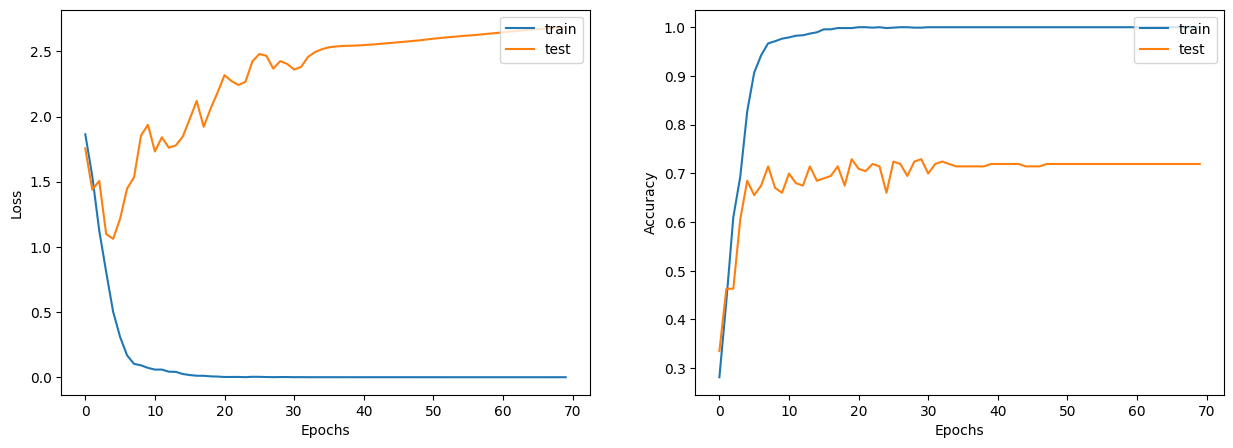

In [ ]:
display_learning_curves(history)

In [ ]:
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 68.02%


### Résumé de ce que fait ce code :

1. **Création du modèle GNN (`GNNNodeClassifier`)** :
   Le modèle `GNNNodeClassifier` est instancié avec les informations nécessaires pour l'entraînement :
   - `graph_info` contient les caractéristiques des nœuds, les arêtes, et les poids des arêtes.
   - Le modèle utilise les paramètres suivants : `num_classes`, `hidden_units`, `dropout_rate`.

2. **Affichage de la forme de sortie du modèle** :
   En passant quelques indices de nœuds `[1, 10, 100]`, le modèle retourne la forme de ses prédictions pour ces nœuds. Cela permet de vérifier si la sortie du modèle correspond aux attentes (dans ce cas, la sortie est de forme `(3, num_classes)`).

3. **Entraînement du modèle** :
   - Le modèle est entraîné sur les données d'entraînement (`x_train` et `y_train`), et l'historique de l'entraînement est enregistré dans `history`.
   - Les courbes d'apprentissage (perte et précision) sont affichées avec la fonction `display_learning_curves()`.

4. **Évaluation du modèle sur les données de test** :
   - Après l'entraînement, le modèle est évalué sur les données de test (`x_test` et `y_test`).
   - La précision sur le test est calculée et affichée. Ici, la précision est de **68.02%**, ce qui indique que le modèle a un taux de bonne classification d'environ 68% sur les données de test.

### Points à retenir :
- Le modèle GNN a montré une **précision de test de 68.02%**.
- Cette précision dépend des hyperparamètres utilisés, de la qualité des données, et de l'architecture du modèle. Si la performance est faible, des ajustements peuvent être nécessaires, par exemple dans le choix des hyperparamètres ou la structure du graphe.

In [ ]:
# First we add the N new_instances as nodes to the graph
# by appending the new_instance to node_features.
num_nodes = node_features.shape[0]
new_node_features = np.concatenate([node_features, new_instances])
# Second we add the M edges (citations) from each new node to a set
# of existing nodes in a particular subject
new_node_indices = [i + num_nodes for i in range(num_classes)]
new_citations = []
for subject_idx, group in papers.groupby("subject"):
    subject_papers = list(group.paper_id)
    # Select random x papers specific subject.
    selected_paper_indices1 = np.random.choice(subject_papers, 5)
    # Select random y papers from any subject (where y < x).
    selected_paper_indices2 = np.random.choice(list(papers.paper_id), 2)
    # Merge the selected paper indices.
    selected_paper_indices = np.concatenate(
        [selected_paper_indices1, selected_paper_indices2], axis=0
    )
    # Create edges between a citing paper idx and the selected cited papers.
    citing_paper_indx = new_node_indices[subject_idx]
    for cited_paper_idx in selected_paper_indices:
        new_citations.append([citing_paper_indx, cited_paper_idx])

new_citations = np.array(new_citations).T
new_edges = np.concatenate([edges, new_citations], axis=1)

In [ ]:
print("Original node_features shape:", gnn_model.node_features.shape)
print("Original edges shape:", gnn_model.edges.shape)
gnn_model.node_features = new_node_features
gnn_model.edges = new_edges
gnn_model.edge_weights = tf.ones(shape=new_edges.shape[1])
print("New node_features shape:", gnn_model.node_features.shape)
print("New edges shape:", gnn_model.edges.shape)

logits = gnn_model.predict(tf.convert_to_tensor(new_node_indices))
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Original node_features shape: (2708, 1433)
Original edges shape: (2, 5429)
New node_features shape: (2715, 1433)
New edges shape: (2, 5478)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Instance 1:
- Case_Based: 98.83%
- Genetic_Algorithms: 0.02%
- Neural_Networks: 0.53%
- Probabilistic_Methods: 0.12%
- Reinforcement_Learning: 0.0%
- Rule_Learning: 0.48%
- Theory: 0.02%
Instance 2:
- Case_Based: 0.37%
- Genetic_Algorithms: 0.34%
- Neural_Networks: 97.68%
- Probabilistic_Methods: 0.11%
- Reinforcement_Learning: 0.11%
- Rule_Learning: 0.04%
- Theory: 1.35%
Instance 3:
- Case_Based: 8.73%
- Genetic_Algorithms: 1.35%
- Neural_Networks: 83.69%
- Probabilistic_Methods: 2.04%
- Reinforcement_Learning: 0.05%
- Rule_Learning: 2.58%
- Theory: 1.56%
Instance 4:
- Case_Based: 0.93%
- Genetic_Algorithms: 0.63%
- Neural_Networks: 17.53%
- Probabilistic_Methods: 33.23%
- Reinforcement_Learning: 0.23%
- Rule_Learning: 0.03%
- Theory: 47.42%
Instance 5:
- Case_Based: 27.98%
- Genetic_Algorithms: 27.93%
- Neural_

Dans cette cellule, nous ajoutons de nouveaux nœuds et de nouvelles arêtes au graphe existant pour simuler l'ajout de nouvelles instances et leur connectivité avec des nœuds existants.

1. **Ajout de nouveaux nœuds** : Vous concaténez `new_instances` aux caractéristiques des nœuds existants (grâce à `node_features`).
   
2. **Ajout de nouvelles arêtes** : Vous générez des arêtes entre les nouveaux nœuds et les nœuds existants en sélectionnant des citations dans le même sujet ainsi que d'autres citations provenant de sujets différents.

3. **Mise à jour des informations du graphe** : Vous mettez à jour les caractéristiques des nœuds et les arêtes dans `gnn_model`.

4. **Prédictions** : Après avoir mis à jour le graphe, vous effectuez une prédiction avec les nouvelles instances ajoutées au graphe.

En somme, nous ajoutons de nouveaux nœuds et arêtes au graphe, puis nous testons le modèle avec les nouvelles informations pour observer comment il prédit les classes pour ces nouvelles instances.

